# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

##### Summary of data 
This dataset analyzes phone-based marketing campaigns by a Portuguese bank to predict whether clients will subscribe to a term deposit (binary classification).

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [85]:
import pandas as pd
import time

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC


In [86]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [89]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

###### Data Clean up 
All the data was good , not much of cleaning. Only renaming column header "y" to "Conversion_Success" 

In [91]:
# Renaming "y" to "Conversion_Success" 
df = df.rename(columns={'y': 'Conversion_Success'})

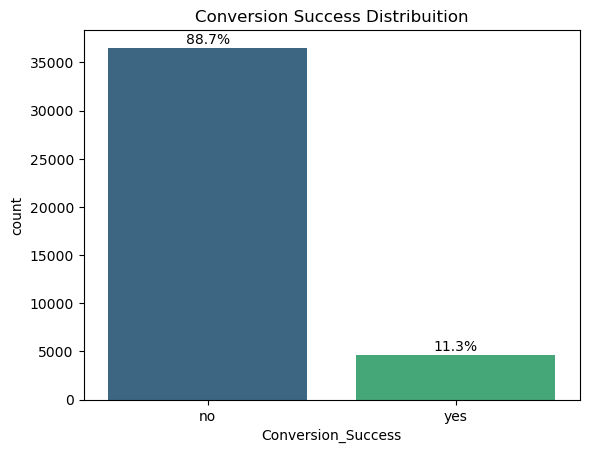

In [92]:
# Chart for Conversion Success distribuition 

ax = sns.countplot(data=df, x="Conversion_Success" , hue="Conversion_Success", palette="viridis" , legend = False)

total = len(df)
for container in ax.containers:
    labels = [f'{(v.get_height()/total)*100:.1f}%' for v in container]
    ax.bar_label(container, labels=labels, padding=1)

plt.title("Conversion Success Distribuition")
plt.savefig("images/Conversion_Success_distribuition.png", dpi=300, bbox_inches='tight')
plt.show()

##### Analysis 1 
This is an imbalanced data. 

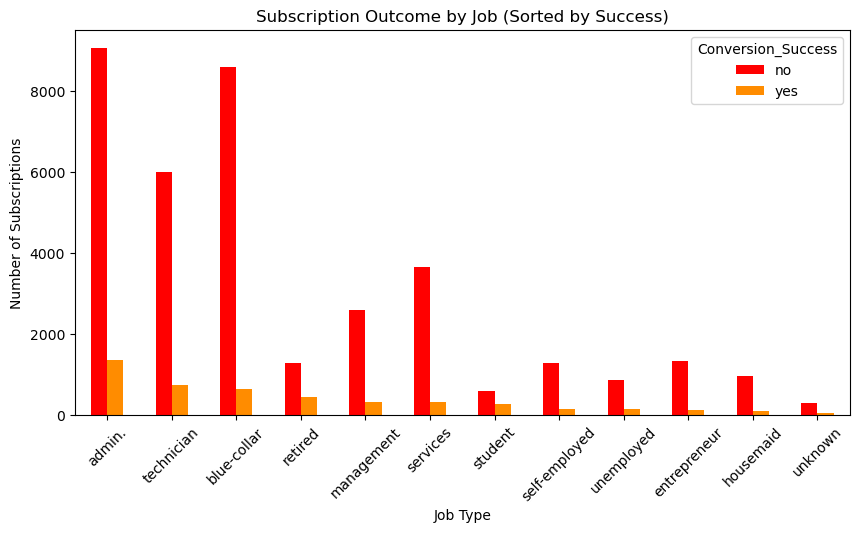

In [93]:
# Subscription Outcome by Job 
ct = pd.crosstab(df["job"], df["Conversion_Success"])

sorted_ct = ct.sort_values(by="yes", ascending=False)
sorted_ct.plot(kind="bar", stacked=False, figsize=(10,5), color=["#FF0000", "#FF8C00"])

plt.title("Subscription Outcome by Job (Sorted by Success)")
plt.ylabel("Number of Subscriptions")
plt.xlabel("Job Type")
plt.xticks(rotation=45)
plt.savefig("images/SubscriptionOutCome.png", dpi=300, bbox_inches='tight')
plt.show()

##### Analysis 2 
People who worked as Admins , Technicians and Blue-Collared responded to the call positively 

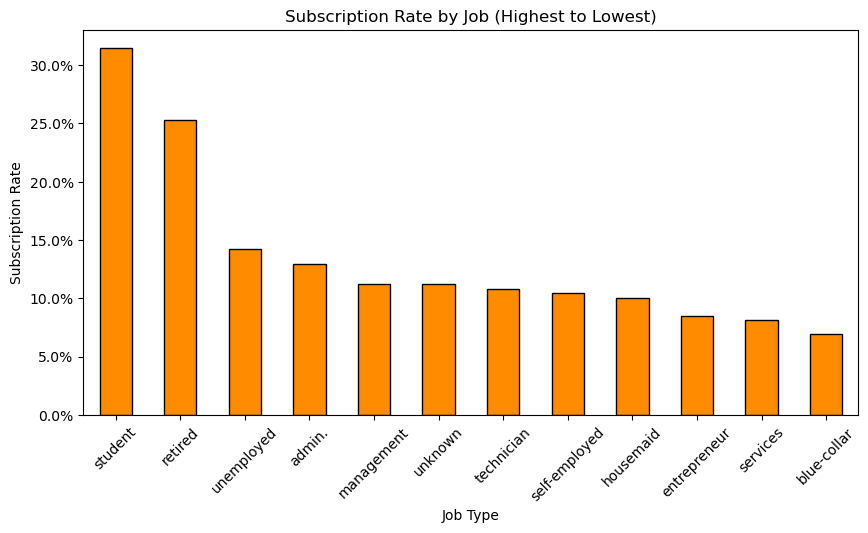

In [94]:
# Conversion rate of the various job types.

job_rate = (
    df.groupby("job")["Conversion_Success"]
      .apply(lambda x: (x == "yes").mean())
)

job_rate.sort_values(ascending=False).plot(
    kind="bar", 
    figsize=(10,5),
    color="#FF8C00",    
    edgecolor="black"
)

plt.ylabel("Subscription Rate")
plt.xlabel("Job Type")
plt.title("Subscription Rate by Job (Highest to Lowest)")
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.savefig("images/Subscription Rate.png", dpi=300, bbox_inches='tight')
plt.show()

##### Analysis 3 
Success % was the highest for students , retired and unemployed.

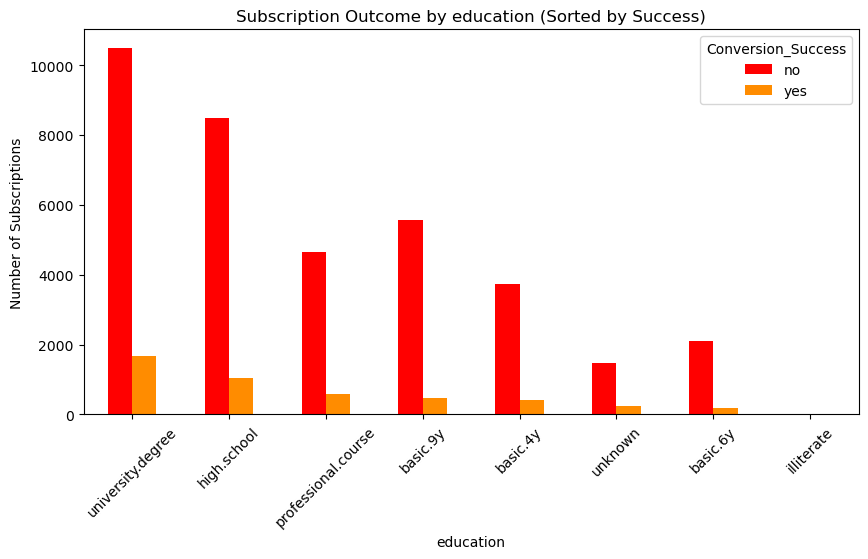

In [95]:
# Subscription Outcome by Education
ct = pd.crosstab(df["education"], df["Conversion_Success"])

sorted_ct = ct.sort_values(by="yes", ascending=False)
sorted_ct.plot(kind="bar", stacked=False, figsize=(10,5), color=["#FF0000", "#FF8C00"])

plt.title("Subscription Outcome by education (Sorted by Success)")
plt.ylabel("Number of Subscriptions")
plt.xlabel("education")
plt.xticks(rotation=45)
plt.savefig("images/educationOutCome.png", dpi=300, bbox_inches='tight')
plt.show()

##### Analysis 4
Those with a university degree subscribed the most . 

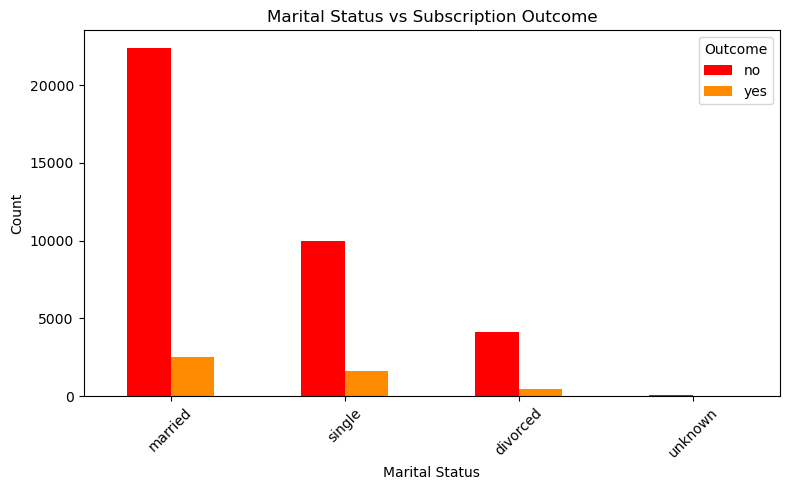

In [96]:
# Subscription Outcome by marital status
ct = pd.crosstab(df["marital"], df["Conversion_Success"])
ct_sorted = ct.sort_values(by="yes", ascending=False)


ct_sorted.plot(
    kind="bar",
    stacked=False,
    figsize=(8,5),
    color=["#FF0000", "#FF8C00"]
)

plt.title("Marital Status vs Subscription Outcome")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.legend(title="Outcome")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("images/maritalStatus.png", dpi=300, bbox_inches='tight')

plt.show()

##### Analysis 5
Married people subscribed the most . 

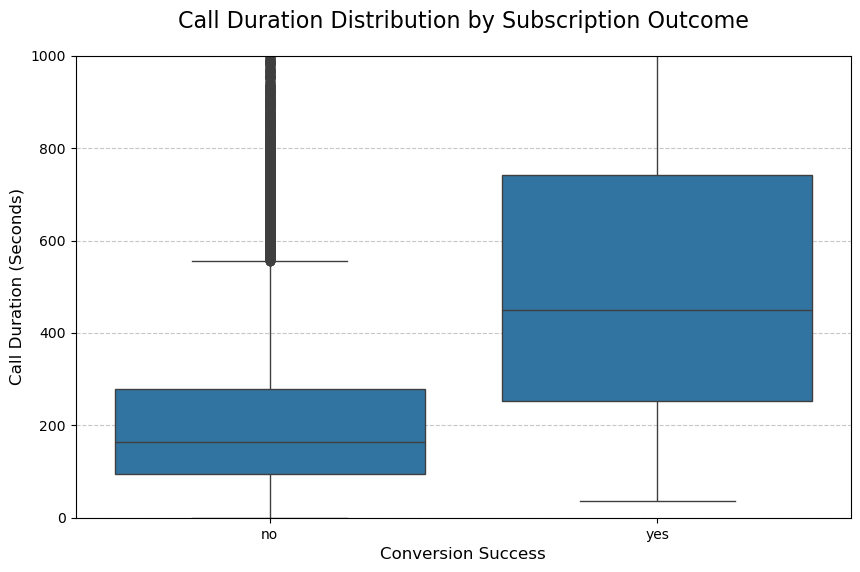

In [97]:
plt.figure(figsize=(10, 6))

# Plot the distribution of duration for 'yes' and 'no' outcomes
sns.boxplot(
    data=df, 
    x="Conversion_Success", 
    y="duration"
)

plt.title("Call Duration Distribution by Subscription Outcome", fontsize=16, pad=20)
plt.ylabel("Call Duration (Seconds)", fontsize=12)
plt.xlabel("Conversion Success", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 1000) 
plt.savefig("images/callDuration.png", dpi=300, bbox_inches='tight')

plt.show()

##### Analysis 6
Those calls which lasted longer had a higher success rate. Almost all calls that lasted more than 280s were successful conversions. 

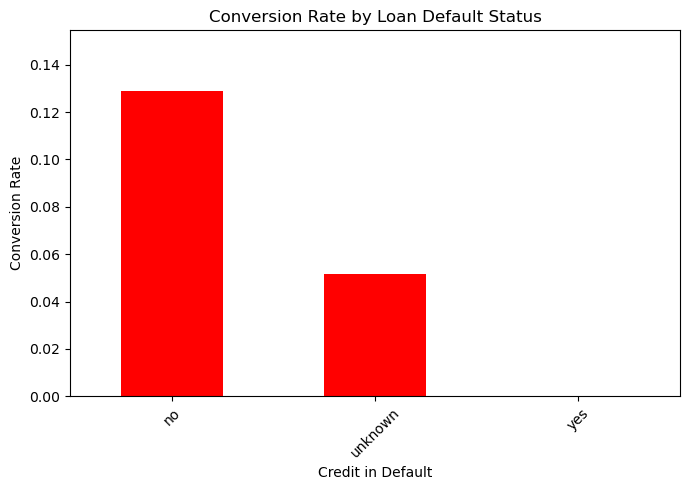

In [98]:
# calculate conversion rate for loan default 
default_rate = (
    df.groupby("default")["Conversion_Success"]
      .apply(lambda x: (x == "yes").mean())
      .sort_values(ascending=False)
)


default_rate.plot(
    kind="bar",
    figsize=(7,5),
    color="#FF0000"
)

plt.title("Conversion Rate by Loan Default Status")
plt.xlabel("Credit in Default")
plt.ylabel("Conversion Rate")
plt.ylim(0, default_rate.max() * 1.2)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("images/loanDefaultStatus.png", dpi=300, bbox_inches='tight')

plt.show()

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

##### What do I want to do ? 

This dataset is from a banking institution's marketing campaign.  The analysis of the data shows that the conversion rate of about 11% , which could be higher. 
The business objective is to determine which factors could lead to a higher conversion rate. From the above analysis it looks like these below features are important in determining whom to call.
 - those with a university degree
 - those who are married
 - those who did not default on a loan
 - age
 - Job Category

Which classifier is best suited to predict whom to call for a higher success rate must be determined in this task.  

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [99]:
# Defining target and features

y = df["Conversion_Success"].map({"yes": 1, "no": 0})
X = df.drop(columns=["Conversion_Success" , "duration"])

In [100]:
# Identifying feature types

categorical_features = X.select_dtypes(include="object").columns
numerical_features = X.select_dtypes(include="number").columns

In [101]:
# Building the pre-procesing pipe line for scaling and encoding 

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [102]:
# Splitting the data 
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [103]:
#Transforming the features using the pre-processor 

X_train_prepared = preprocessor.fit_transform(X_train)
X_test_prepared = preprocessor.transform(X_test)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

##### A baseline model a reference point — a “no-skill” model that shows how well you would do without learning anything from the features.
##### DummyClassifier in scikit-learn is designed for this purpose.

In [104]:
# Building baseline model using DummyClassifier
baseline_model = DummyClassifier(strategy="most_frequent")

In [105]:
# Training 
start_train = time.time()
baseline_model.fit(X_train_prepared, y_train)
end_train = time.time()
train_time_baseline = end_train - start_train

In [106]:
# Testing 
start_pred = time.time()
y_pred_baseline = baseline_model.predict(X_test_prepared)
end_pred = time.time()
pred_time_baseline = end_pred - start_pred


In [107]:
# Printing results 
print("=== Baseline model Metrics ===")
print("Baseline Accuracy:", accuracy_score(y_test, y_pred_baseline))

# Metrics with zero_division=0 to suppress warnings
print("Baseline Precision:", precision_score(y_test, y_pred_baseline, zero_division=0))
print("Baseline Recall:", recall_score(y_test, y_pred_baseline, zero_division=0))
print("Baseline F1 Score:", f1_score(y_test, y_pred_baseline, zero_division=0))
print(f"Training time: {train_time_baseline:.6f} seconds")
print(f"Prediction time: {pred_time_baseline:.6f} seconds")

# Classification report with zero_division=0
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_baseline, zero_division=0))

=== Baseline model Metrics ===
Baseline Accuracy: 0.8873512988589464
Baseline Precision: 0.0
Baseline Recall: 0.0
Baseline F1 Score: 0.0
Training time: 0.003647 seconds
Prediction time: 0.000456 seconds

Classification Report:

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7310
           1       0.00      0.00      0.00       928

    accuracy                           0.89      8238
   macro avg       0.44      0.50      0.47      8238
weighted avg       0.79      0.89      0.83      8238



##### Baseline model 
The baseline model predicts only the majority class due to class imbalance, resulting in zero predicted positives. Consequently, precision, recall, and F1 for the positive class are 0. This is expected and illustrates that the baseline cannot identify subscribers.

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [108]:
# Building LR Model 

logreg_pipeline = Pipeline([
    ("preprocessor", preprocessor),           # From earlier: encoding + scaling
    ("classifier", LogisticRegression(max_iter=1000, random_state=42))
])


In [109]:
# Measure training time

start_train = time.time()
logreg_pipeline.fit(X_train, y_train)
end_train = time.time()
train_time = end_train - start_train

In [110]:
# Testing time 
start_pred = time.time()
y_pred = logreg_pipeline.predict(X_test)
end_pred = time.time()
pred_time = end_pred - start_pred

In [111]:
# Computing Metrics 

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

In [112]:
# Printing Results 

print("=== Logistic Regression Metrics ===")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"Training time: {train_time:.6f} seconds")
print(f"Prediction time: {pred_time:.6f} seconds")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, zero_division=0))

=== Logistic Regression Metrics ===
Accuracy:  0.9009
Precision: 0.6905
Recall:    0.2188
F1 Score:  0.3322
Training time: 0.493579 seconds
Prediction time: 0.043111 seconds

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7310
           1       0.69      0.22      0.33       928

    accuracy                           0.90      8238
   macro avg       0.80      0.60      0.64      8238
weighted avg       0.88      0.90      0.88      8238



### Problem 9: Score the Model

What is the accuracy of your model?

In [133]:
# Baseline metrics 
baseline_metrics = {
    "Model": "Baseline (DummyClassifier)",
    "Accuracy": accuracy_score(y_test, y_pred_baseline),
    "Precision": precision_score(y_test, y_pred_baseline, zero_division=0),
    "Recall": recall_score(y_test, y_pred_baseline, zero_division=0),
    "F1 Score": f1_score(y_test, y_pred_baseline, zero_division=0),
    "Train Time (s)": train_time_baseline,
    "Prediction Time (s)": pred_time_baseline
}

# Logistic Regression metrics

logreg_metrics = {
    "Model": "Logistic Regression",
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred, zero_division=0),
    "Recall": recall_score(y_test, y_pred, zero_division=0),
    "F1 Score": f1_score(y_test, y_pred, zero_division=0),
    "Train Time (s)": train_time,
    "Prediction Time (s)": pred_time
}


# Combine into DataFrame

comparison_df = pd.DataFrame([baseline_metrics, logreg_metrics])


In [134]:
comparison_df

,Model,Accuracy,Precision,Recall,F1 Score,Train Time (s),Prediction Time (s)
0,Baseline (DummyClassifier),0.887351,0.000000,0.00000,0.000000,0.003647,0.000456
1,Logistic Regression,0.900947,0.690476,0.21875,0.332242,0.493579,0.043111


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [118]:
# Building a Decision Tree Model 

dt_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier(max_depth=5, random_state=42))
])

# Training and Testing time

start_train = time.time()
dt_pipeline.fit(X_train, y_train)
end_train = time.time()
train_time_dt = end_train - start_train

start_pred = time.time()
y_pred_dt = dt_pipeline.predict(X_test)
end_pred = time.time()
pred_time_dt = end_pred - start_pred


In [116]:
# Adding the Decision Tree metrics to the comparsion matrix

comparison_df.loc[2] = {
    "Model": "Decision Tree",
    "Accuracy": accuracy_score(y_test, y_pred_dt),
    "Precision": precision_score(y_test, y_pred_dt, zero_division=0),
    "Recall": recall_score(y_test, y_pred_dt, zero_division=0),
    "F1 Score": f1_score(y_test, y_pred_dt, zero_division=0),
    "Train Time (s)": train_time_dt,
    "Prediction Time (s)": pred_time_dt
}


In [120]:
# Creating SVM 
svm_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ('model', SVC())
])

# Calculating metrics for SVM 

start_train = time.time()
svm_pipeline.fit(X_train, y_train)
end_train = time.time()
train_time_svm = end_train - start_train

start_pred = time.time()
y_pred_svm = svm_pipeline.predict(X_test)
end_pred = time.time()
pred_time_svm = end_pred - start_pred

In [121]:
# Adding SVM Metrics to comparision data

comparison_df.loc[3] = {
    "Model": "SVM (linear)",
    "Accuracy": accuracy_score(y_test, y_pred_svm),
    "Precision": precision_score(y_test, y_pred_svm, zero_division=0),
    "Recall": recall_score(y_test, y_pred_svm, zero_division=0),
    "F1 Score": f1_score(y_test, y_pred_svm, zero_division=0),
    "Train Time (s)": train_time_svm,
    "Prediction Time (s)": pred_time_svm
}


In [122]:
# Creating KNN model 

knn_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", KNeighborsClassifier(n_neighbors=5))
])

In [123]:
# Calculating metrics for KNN 

start_train = time.time()
knn_pipeline.fit(X_train, y_train)
end_train = time.time()
train_time_knn = end_train - start_train

start_pred = time.time()
y_pred_knn = knn_pipeline.predict(X_test)
end_pred = time.time()
pred_time_knn = end_pred - start_pred



comparison_df.loc[4] = {
    "Model": "KNN (k=5)",
    "Accuracy": accuracy_score(y_test, y_pred_knn),
    "Precision": precision_score(y_test, y_pred_knn, zero_division=0),
    "Recall": recall_score(y_test, y_pred_knn, zero_division=0),
    "F1 Score": f1_score(y_test, y_pred_knn, zero_division=0),
    "Train Time (s)": train_time_knn,
    "Prediction Time (s)": pred_time_knn
}

# Comparsion of models 
comparison_df 

,Model,Accuracy,Precision,Recall,F1 Score,Train Time (s),Prediction Time (s)
0,Baseline (DummyClassifier),0.887351,0.000000,0.000000,0.000000,0.003647,0.000456
1,Logistic Regression,0.900947,0.690476,0.218750,0.332242,0.493579,0.043111
2,Decision Tree,0.902525,0.685460,0.248922,0.365217,0.285083,0.037566
3,SVM (linear),0.903496,0.695015,0.255388,0.373522,189.950841,14.792240
4,KNN (k=5),0.897184,0.583505,0.304957,0.400566,0.143431,0.462237


##### From the above statistics , Logistic Regression has the best statistics for Accuracy , Precision and Recall and also has a reasonable training and prediction time. 


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.


- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [124]:
# Tuning Logical Regression 

tuned_logreg = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(
        max_iter=2000,
        class_weight="balanced",
        solver="lbfgs"
    ))
])

param_grid = [
    {
        "classifier__solver": ["lbfgs"],
        "classifier__penalty": ["l2"],
        "classifier__C": [0.01, 0.1, 1, 10]
    },
    {
        "classifier__solver": ["liblinear"],
        "classifier__penalty": ["l1", "l2"],
        "classifier__C": [0.01, 0.1, 1, 10]
    }
]

grid = GridSearchCV(
    tuned_logreg,
    param_grid,
    scoring="f1",
    cv=5,
    n_jobs=-1
)
# Timing
start = time.time()
grid.fit(X_train, y_train)
train_time_tuned = time.time() - start

start = time.time()
y_pred_tuned = grid.best_estimator_.predict(X_test)
test_time_tuned = time.time() - start

In [125]:
# Metrics 

tuned_metrics = {
    "Model": "Logistic Regression Tuned",
    "Accuracy": accuracy_score(y_test, y_pred_tuned),
    "Precision": precision_score(y_test, y_pred_tuned, zero_division=0),
    "Recall": recall_score(y_test, y_pred_tuned, zero_division=0),
    "F1 Score": f1_score(y_test, y_pred_tuned, zero_division=0),
    "Train Time (s)": train_time_tuned,
    "Prediction Time (s)": test_time_tuned
}
tuned_df = pd.DataFrame([tuned_metrics])
print("Logistic Regression Best Params" , grid.best_params_) 

Logistic Regression Best Params {'classifier__C': 10, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}


Due to class imbalance, accuracy is not an appropriate metric for evaluating model performance. After tuning the Logistic Regression model using class weighting and optimizing for F1 score, accuracy decreased slightly while recall and F1 score increased significantly. This indicates improved performance in identifying customers likely to subscribe.

In [126]:
# Tuning the decision tree model 

dt_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier(random_state=42))
])

param_grid = {
    "classifier__max_depth": [3, 5, 7, 10, None],
    "classifier__min_samples_split": [2, 10, 50],
    "classifier__min_samples_leaf": [1, 5, 20],
    "classifier__class_weight": [None, "balanced"]
}

grid_dt = GridSearchCV(
    dt_pipeline,
    param_grid,
    scoring="f1",
    cv=5,
    n_jobs=-1
)

# Training time 
start = time.time()
grid_dt.fit(X_train, y_train)
train_time_dt_tuned = time.time() - start

#  Testing time 
best_dt = grid_dt.best_estimator_

start = time.time()
y_pred_dt = best_dt.predict(X_test)
test_time_dt_tuned = time.time() - start



In [127]:
# Metrics 
tuned_df.loc[1] = {
     "Model": "Decision Tree Tuned",
    "Accuracy": accuracy_score(y_test, y_pred_dt),
    "Precision": precision_score(y_test, y_pred_dt, zero_division=0),
    "Recall": recall_score(y_test, y_pred_dt, zero_division=0),
    "F1 Score": f1_score(y_test, y_pred_dt, zero_division=0),
    "Train Time (s)": train_time_dt_tuned,
    "Prediction Time (s)": test_time_dt_tuned
}

print("Decision Tree Tuned Best Params" , grid_dt.best_params_)

Decision Tree Tuned Best Params {'classifier__class_weight': 'balanced', 'classifier__max_depth': 7, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 50}


In [128]:
# Tuning the KNN Model. 

knn_pipeline = Pipeline([
    ("preprocessor", preprocessor),  # scaling + encoding
    ("classifier", KNeighborsClassifier())
])

param_grid = {
    "classifier__n_neighbors": [3, 5, 7, 11, 15],
    "classifier__weights": ["uniform", "distance"],
    "classifier__metric": ["euclidean", "manhattan"]
}

grid_knn = GridSearchCV(
    knn_pipeline,
    param_grid,
    scoring="f1",
    cv=5,
    n_jobs=-1
)

#  Training time
start = time.time()
grid_knn.fit(X_train, y_train)
train_time_knn = time.time() - start

# Testing time 
best_knn = grid_knn.best_estimator_

start = time.time()
y_pred_knn = best_knn.predict(X_test)
test_time_knn = time.time() - start




In [129]:
# Metrics 
tuned_df.loc[2] = {
    "Model": "KNN Tuned",
    "Accuracy": accuracy_score(y_test, y_pred_knn),
    "Precision": precision_score(y_test, y_pred_knn, zero_division=0),
    "Recall": recall_score(y_test, y_pred_knn, zero_division=0),
    "F1 Score": f1_score(y_test, y_pred_knn, zero_division=0),
    "Train Time (s)": train_time_knn,
    "Prediction Time (s)": test_time_knn
}
print("KNN Best Parameters" , grid_knn.best_params_)

KNN Best Parameters {'classifier__metric': 'euclidean', 'classifier__n_neighbors': 5, 'classifier__weights': 'uniform'}


In [130]:
# Tuning the SVM Model 

# Pipeline with preprocessing
svm_pipeline = Pipeline([
    ("preprocessor", preprocessor),   # encoding + scaling
    ("classifier", LinearSVC(random_state=42, max_iter=5000))
])

# Grid for tuning
param_grid = {
    "classifier__C": [0.01, 0.1, 1, 10],
    "classifier__loss": ["hinge", "squared_hinge"]
}

grid_svm = GridSearchCV(
    svm_pipeline,
    param_grid,
    scoring="f1",
    cv=5,
    n_jobs=-1
)

#  Training time 
start = time.time()
grid_svm.fit(X_train, y_train)
train_time_svm = time.time() - start

# Testing time 
best_svm = grid_svm.best_estimator_

start = time.time()
y_pred_svm = best_svm.predict(X_test)
test_time_svm = time.time() - start

In [131]:
# Metrics and final comparsion of all tuned models. 

tuned_df.loc[3] = {
    "Model": "SVM Tuned",
    "Accuracy": accuracy_score(y_test, y_pred_svm),
    "Precision": precision_score(y_test, y_pred_svm, zero_division=0),
    "Recall": recall_score(y_test, y_pred_svm, zero_division=0),
    "F1 Score": f1_score(y_test, y_pred_svm, zero_division=0),
    "Train Time (s)": train_time_svm,
    "Prediction Time (s)": test_time_svm
}

print("SVM Best Parameters" , grid_svm.best_params_)
tuned_df

SVM Best Parameters {'classifier__C': 10, 'classifier__loss': 'squared_hinge'}


,Model,Accuracy,Precision,Recall,F1 Score,Train Time (s),Prediction Time (s)
0,Logistic Regression Tuned,0.835154,0.367936,0.645474,0.468701,35.094634,0.037897
1,Decision Tree Tuned,0.827628,0.354953,0.648707,0.458841,34.585914,0.057710
2,KNN Tuned,0.897184,0.583505,0.304957,0.400566,90.805186,1.197673
3,SVM Tuned,0.901432,0.716418,0.206897,0.321070,100.594855,0.039116


##### Questions